# Machine Learning:

##### In this notebook we will continue to explore information regarding global volcanoes with eruptions. 
##### We will do the following:
* Train classification models and predict the test examples
* Run evaluation for the classification models

### Import modules:

##### This step is necessary in order to use external packages.¶
##### We will be using pandas, numpy, sklearn, train_test_split, matplotlib, seaborn and more.

In [100]:
import os                    
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

### Load volcano dataset:

##### The load_csv function loads a CSV file specified by file_name into a pandas DataFrame and returns it.

In [3]:
def load_csv(file_name):
    df= pd.read_csv(file_name)
    return df

In [8]:
file_name = '.' + os.sep + 'volcano_cleaned_df2.csv'
df_volcano = load_csv(file_name)
df_volcano

,Volcano name,Volcano number,Volcano country,Volcano region,Volcano type,Summit elevation,VEI,Start date,Currently erupting (Y/N),Latitude:,Longitude:
0,Acatenango,507,Guatemala,Guatemala,14,3976,1,1972,0,14.501,-90.876
1,Acatenango,507,Guatemala,Guatemala,14,3976,2,1926,0,14.501,-90.876
2,Acatenango,507,Guatemala,Guatemala,14,3976,3,1924,0,14.501,-90.876
3,Adams,442,United States,Washington,14,3742,2,950,0,46.206,-121.490
4,Adams,442,United States,Washington,14,3742,2,200,0,46.206,-121.490
...,...,...,...,...,...,...,...,...,...,...,...
7362,Zitacuaro-Valle de Bravo,496,Mexico,Mexico,19,3500,0,-3050,0,19.400,-100.250
7363,Zubair Group,16,Yemen,Africa northeastern and Red Sea,13,191,2,2013,0,15.050,42.180
7364,Zubair Group,16,Yemen,Africa northeastern and Red Sea,13,191,2,2011,0,15.050,42.180
7365,Zubair Group,16,Yemen,Africa northeastern and Red Sea,13,191,2,1824,0,15.050,42.180


### Transfer string to numeric:

##### The transfer_str_to_numeric_vals function converts string values in a dataset to numeric values by creating a copy of the dataset and assigning unique numeric values to each string category in each column. 
##### It replaces the string values with their corresponding numeric values and returns the modified dataset.

In [9]:
def transfer_str_to_numeric_vals(dataset):
    df_new = dataset.copy()
    cols = dataset.columns
    for col in cols:
        labels = df_new[col].astype('category').cat.categories.to_list()
        replace_map = {col:{x:y for x,y in zip(labels, list(range(1, len(labels)+1)))}}
        df_new.replace(replace_map, inplace=True)
    return df_new

In [17]:
dataset = df_volcano[['Volcano name', 'Volcano number', 'Volcano country', 'Volcano region']]
dataset2 = transfer_str_to_numeric_vals(dataset)

In [16]:
dataset3 = df_volcano[['Volcano type', 'Summit elevation', 'VEI', 'Start date', 
                       'Currently erupting (Y/N)', 'Latitude:', 'Longitude:']]

In [102]:
## combine dataframes 
combined_df = pd.concat([dataset2, dataset3], axis=1)

### Min-Max Normalization:

##### The function normalize_column takes a DataFrame and a column name as input.¶
##### It calculates the minimum and maximum values of the specified column in the DataFrame and returns a normalized version of the column by subtracting the minimum value and dividing by the range (max-min).
##### This function helps in scaling the values of a column between 0 and 1.

In [22]:
def normalize_column(df, col):
    min_val = df[col].min()
    max_val = df[col].max()
    return (df[col] - min_val) / (max_val - min_val)

In [26]:
combined_df['Summit elevation'] = normalize_column(combined_df, 'Summit elevation')

In [27]:
combined_df['Start date'] = normalize_column(combined_df, 'Start date')
combined_df

,Volcano name,Volcano number,Volcano country,Volcano region,Volcano type,Summit elevation,VEI,Start date,Currently erupting (Y/N),Latitude:,Longitude:
0,1,507,32,38,14,0.747417,1,0.996259,0,14.501,-90.876
1,1,507,32,38,14,0.747417,2,0.992818,0,14.501,-90.876
2,1,507,32,38,14,0.747417,3,0.992669,0,14.501,-90.876
3,2,442,68,92,14,0.726026,2,0.919802,0,46.206,-121.490
4,2,442,68,92,14,0.726026,2,0.863694,0,46.206,-121.490
...,...,...,...,...,...,...,...,...,...,...,...
7362,680,496,41,61,19,0.703903,0,0.620558,0,19.400,-100.250
7363,681,16,71,4,13,0.401408,2,0.999327,0,15.050,42.180
7364,681,16,71,4,13,0.401408,2,0.999177,0,15.050,42.180
7365,681,16,71,4,13,0.401408,2,0.985187,0,15.050,42.180


### Split dataset to train and test:

##### The function split_to_train_and_test is used to split a dataset into training and testing sets for machine learning. 
##### It takes the dataset, the label column name, the test ratio, and the random state as inputs. 
##### The function creates a copy of the dataset and separates the features (X) from the target variable (y). Then, it uses the train_test_split function from the scikit-learn library to split the data into X_train, X_test, y_train, and y_test based on the provided test ratio and random state.
##### Finally, it returns the training and testing sets.

In [28]:
def split_to_train_and_test(dataset, label_column, test_ratio, rand_state):
    df = dataset.copy()
    X = df.drop([label_column], axis = 1)
    y = pd.Series(df[label_column])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_ratio, random_state= rand_state)
    return X_train, X_test, y_train, y_test

In [34]:
test_ratio, rand_state = 0.2, 42
category_col_name = 'VEI'
X_train, X_test, y_train, y_test = split_to_train_and_test(combined_df, category_col_name, test_ratio, rand_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5893, 10) (1474, 10) (5893,) (1474,)


## KNN:

##### The machine learning model used in this code snippet is the K-Nearest Neighbors (KNN) classifier, which is evaluated and optimized based on the best mean score obtained using cross-validation.
##### The scores evaluated for the KNN classifier in this code snippet include accuracy, precision, F1 score, and recall.

In [39]:
k_values = range(1, 21)

best_k = None
best_score = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_k = k
print("Best K: ", best_k)
print("Best Score: ", best_score)

Best K:  5
Best Score:  0.5847609049711202


In [84]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
print("Accuracy (KNN Classifier):", accuracy)
print("Precision (KNN Classifier):", precision)
print("F1 Score (KNN Classifier):", f1)
print("Recall (KNN Classifier):", recall_knn)

Accuracy (KNN Classifier): 0.5814111261872456
Precision (KNN Classifier): 0.5814111261872456
F1 Score (KNN Classifier): 0.5592083565388525
Recall (KNN Classifier): 0.5814111261872456


##### Confusion Matrix: visualized as a heatmap, to display the predicted versus actual values for a classification model.

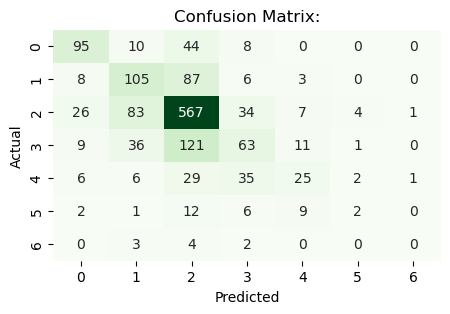

In [60]:
cm = confusion_matrix(y_test, y_pred)

# Display heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix:')
plt.show()

## Naive Bayes:

##### The code utilizes Gaussian Naive Bayes classifier to train on the dataset, predicts the target variable for the test data, and calculates the accuracy, F1 score, and recall metrics for evaluating the classifier's performance.

In [103]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy (Naive Bayes Classifier):", accuracy)
print("F1 Score (Naive Bayes Classifier):", f1)
print("Recall (Naive Bayes Classifier):", recall)

Accuracy (Naive Bayes Classifier): 0.5094979647218453
F1 Score (Naive Bayes Classifier): 0.5094979647218453
Recall (Naive Bayes Classifier): 0.5094979647218453


## MLP:

##### The code trains a Multi-Layer Perceptron (MLP) classifier on the training data, predicts the target variable for the test data, and calculates the accuracy, F1 score, and recall for the MLP classifier.

In [88]:
mlp = MLPClassifier(max_iter=1000)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall_mlp = recall_score(y_test, y_pred, average='weighted')
print("Accuracy (MLP Classifier):", accuracy)
print("F1 Score (MLP Classifier):", f1)
print("Recall (MLP Classifier):", recall_mlp)

Accuracy (MLP Classifier): 0.5325644504748982
F1 Score (MLP Classifier): 0.46494069255380216
Recall (MLP Classifier): 0.5325644504748982


## SVM:

##### The code implements the Support Vector Machine (SVM) classifier, trains it on the training data, predicts the target variable for the test data, and calculates the accuracy, F1 score, and recall for the SVM classifier.

In [91]:
svm = SVC()

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
print("Accuracy (SVM Classifier):", accuracy)
print("F1 Score (SVM Classifier):", f1)
print("Recall (SVM Classifier):", recall_svm)

Accuracy (SVM Classifier): 0.5162822252374492
F1 Score (SVM Classifier): 0.37119264146674574
Recall (SVM Classifier): 0.5162822252374492


## Random Forest:

##### The code initializes a Random Forest Classifier with 300 estimators and bootstrap enabled. It is then trained on the training data and used to predict the target variable for the test data.
##### It is also calculates and displays the accuracy, F1 score, and recall of the Random Forest Classifier.

In [92]:
rf_classifier = RandomForestClassifier(bootstrap= True, n_estimators=300, random_state= 0)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Accuracy (Random Forest Classifier):", accuracy)
print("F1 Score (Random Forest Classifier):", f1)
print("Recall (Random Forest Classifier):", recall)

Accuracy (Random Forest Classifier): 0.5637720488466758
F1 Score (Random Forest Classifier): 0.5602370358654141
Recall (Random Forest Classifier): 0.5637720488466758


## Logistic Regression:

##### The features in the training and test data are scaled using the StandardScaler to ensure they have zero mean and unit variance. 
##### Logistic Regression Classifier is then applied to the scaled data, and the predictions are made on the test set. 
##### The accuracy, F1 score, and recall of the Logistic Regression Classifier are computed and printed.

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy (Logistic Regression Classifier):", accuracy)
print("F1 Score (Logistic Regression Classifier):", f1)
print("Recall (Logistic Regression Classifier):", recall)

Accuracy (Logistic Regression Classifier): 0.5128900949796472
F1 Score (Logistic Regression Classifier): 0.5128900949796472
Recall (Logistic Regression Classifier): 0.5128900949796472
